## Import libraries 

In [1]:
import re
import numpy as np
import pandas as pd
import nltk
from pprint import pprint
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words.extend(['after', 'afterwards','again','against', 'all', 'almost','alone','along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides',
           'between',
           'beyond',
           'bill',
           'both',
           'bottom',
           'but',
           'by',
           'call',
           'can',
           'cannot',
           'cant',
           'co',
           'con',
           'could',
           'couldnt',
           'cry',
           'de',
           'describe',
           'detail',
           'do',
           'done',
           'down',
           'due',
           'during',
           'each',
           'eg',
           'eight',
           'either',
           'eleven',
           'else',
           'elsewhere',
           'empty',
           'enough',
           'etc',
           'even',
           'ever',
           'every',
           'everyone',
           'everything',
           'everywhere',
           'except',
           'few',
           'fifteen',
           'fifty',
           'fill',
           'find',
           'fire',
           'first',
           'five',
           'for',
           'former',
           'formerly',
           'forty',
           'found',
           'four',
           'from',
           'front',
           'full',
           'further',
           'get',
           'give',
           'go',
           'had',
           'has',
           'hasnt',
           'have',
           'he',
           'hence',
           'her',
           'here',
           'hereafter',
           'hereby',
           'herein',
           'hereupon',
           'hers',
           'herself',
           'him',
           'himself',
           'his',
           'how',
           'however',
           'hundred',
           'i',
           'ie',
           'if',
           'in',
           'inc',
           'indeed',
           'interest',
           'into',
           'is',
           'it',
           'its',
           'itself',
           'keep',
           'last',
           'latter',
           'latterly',
           'least',
           'less',
           'ltd',
           'made',
           'many',
           'may',
           'me',
           'meanwhile',
           'might',
           'mill',
           'mine',
           'more',
           'moreover',
           'most',
           'mostly',
           'move',
           'much',
           'must',
           'my',
           'myself',
           'name',
           'namely',
           'neither',
           'never',
           'nevertheless',
           'next',
           'nine',
           'no',
           'nobody',
           'none',
           'noone',
           'nor',
           'not',
           'nothing',
           'now',
           'nowhere',
           'of',
           'off',
           'often',
           'on',
           'once',
           'one',
           'only',
           'onto',
           'or',
           'other',
           'others',
           'otherwise',
           'our',
           'ours',
           'ourselves',
           'out',
           'over',
           'own',
           'part',
           'per',
           'perhaps',
           'please',
           'put',
           'rather',
           're',
           'same',
           'say',
           'see',
           'seem',
           'seemed',
           'seeming',
           'seems',
           'serious',
           'several',
           'she',
           'should',
           'show',
           'side',
           'since',
           'sincere',
           'six',
           'sixty',
           'so',
           'some',
           'somehow',
           'someone',
           'something',
           'sometime',
           'sometimes',
           'somewhere',
           'still',
           'such',
           'system',
           'take',
           'ten',
           'than',
           'that',
           'the',
           'their',
           'them',
           'themselves',
           'then',
           'thence',
           'there',
           'thereafter',
           'thereby',
           'therefore',
           'therein',
           'thereupon',
           'these',
           'they',
           'thick',
           'thin',
           'third',
           'this',
           'those',
           'though',
           'three',
           'through',
           'throughout',
           'thru',
           'thus',
           'to',
           'together',
           'too',
           'top',
           'toward',
           'towards',
           'twelve',
           'twenty',
           'two',
           'un',
           'under',
           'until',
           'up',
           'upon',
           'us',
           'very',
           'via',
           'was',
           'we',
           'well',
           'were',
           'what',
           'whatever',
           'when',
           'whence',
           'whenever',
           'where',
           'whereafter',
           'whereas',
           'whereby',
           'wherein',
           'whereupon',
           'wherever',
           'whether',
           'which',
           'while',
           'whither',
           'who',
           'whoever',
           'whole',
           'whom',
           'whose',
           'why',
           'will',
           'with',
           'within',
           'without',
           'would',
           'yet',
           'you',
           'your',
           'yours',
           'yourself',
           'yourselves'])

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim import models

# spacy for lemmatization
import spacy

# Plotting tools
from wordcloud import WordCloud
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chide\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Loading BokehJS ...

## Load data

In [2]:
df = pd.read_csv('Combined_News_DJIA.csv')
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

## Process & Clean data

In [3]:
data = []
for row in range(0,len(df.index)):
    data.append(' '.join(str(x) for x in df.iloc[row,2:27]))


In [4]:
data = [re.sub("b\'", '', doc) for doc in data]

data = [re.sub("\'", '', doc) for doc in data]

data = [re.sub("b", '', doc) for doc in data]

pprint(len(data))

1989


In [5]:
df_date = []
for i in df['Date']:
    df_date.append(i)

date = pd.to_datetime(df_date)
date = pd.DataFrame(date, columns=['publish_date'])

text = pd.DataFrame(data, columns=['Text'])

df2 = date.join(text)
new_df = df2['Text']
new_df.index = df2['publish_date']

In [6]:
def doc_to_words(data):
    for doc in data:
        yield(gensim.utils.simple_preprocess(str(doc), deacc=True))  # deacc=True removes punctuations

data_doc_words = list(doc_to_words(data))

print(data_doc_words[:1])

[['georgia', 'downs', 'two', 'russian', 'warplanes', 'as', 'countries', 'move', 'to', 'rink', 'of', 'war', 'breaking', 'musharraf', 'to', 'impeached', 'russia', 'today', 'columns', 'of', 'troops', 'roll', 'into', 'south', 'ossetia', 'footage', 'from', 'fighting', 'youtue', 'russian', 'tanks', 'are', 'moving', 'towards', 'the', 'capital', 'of', 'south', 'ossetia', 'which', 'has', 'reportedly', 'een', 'completely', 'destroyed', 'georgian', 'artillery', 'fire', 'afghan', 'children', 'raped', 'with', 'impunity', 'official', 'says', 'this', 'is', 'sick', 'three', 'year', 'old', 'was', 'raped', 'and', 'they', 'do', 'nothing', 'russian', 'tanks', 'have', 'entered', 'south', 'ossetia', 'whilst', 'georgia', 'shoots', 'down', 'two', 'russian', 'jets', 'breaking', 'georgia', 'invades', 'south', 'ossetia', 'russia', 'warned', 'it', 'would', 'intervene', 'on', 'sos', 'side', 'the', 'enemy', 'comatent', 'trials', 'are', 'nothing', 'ut', 'sham', 'salim', 'haman', 'has', 'een', 'sentenced', 'to', 'yea

In [7]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_doc_words, min_count=5, threshold=50) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_doc_words], threshold=50)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_doc_words[1]]])

['why', 'wont', 'america', 'and', 'nato', 'help', 'us', 'if', 'they', 'wont', 'help', 'us', 'now', 'why_did', 'we', 'help', 'them', 'in', 'iraq', 'bush', 'puts', 'foot', 'down', 'on', 'georgian', 'conflict', 'jewish', 'georgian', 'minister', 'thanks', 'to', 'israeli', 'training', 'were', 'fending', 'off', 'russia', 'georgian', 'army', 'flees', 'in', 'disarray', 'as', 'russians', 'advance', 'gori', 'aandoned', 'to', 'russia', 'without', 'shot', 'fired', 'olympic', 'opening', 'ceremony', 'fireworks', 'faked', 'what', 'were', 'the', 'mossad', 'with', 'fraudulent', 'new_zealand', 'passports', 'doing', 'in', 'iraq', 'russia', 'angered', 'israeli', 'military', 'sale', 'to', 'georgia', 'an', 'american', 'citizen', 'living', 'in', 'ossetia', 'lames', 'and', 'georgian', 'leaders', 'for', 'the', 'genocide', 'of', 'innocent', 'people', 'welcome', 'to', 'world', 'war', 'iv', 'now', 'in', 'high', 'definition', 'georgias', 'move', 'mistake', 'of', 'monumental', 'proportions', 'russia', 'presses', 'd

In [8]:
# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
nlp.max_length = 3000000

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([word.lemma_ for word in doc if word.pos_ in allowed_postags])
    return texts_out

In [9]:
# Remove Stop Words
data_words_nostops = remove_stopwords(data_doc_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

#print(data_lemmatized[:1])
print(len(data_lemmatized))


1989


In [10]:
new_text = []
for i in data_lemmatized:
    for x in i:
        new_text.append(x)
print('Texts Count', len(new_text))

Texts Count 344949


## Analyse data

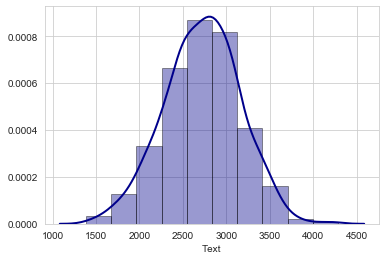

In [11]:
sns.distplot(new_df.str.len(), hist=True, kde=True, 
             bins=int(10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

Text(0.5, 1.0, 'Most Frequent Stop-words')

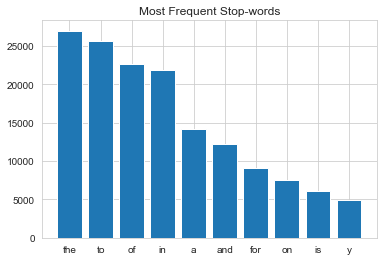

In [12]:
corpus4 = []
new= new_df.str.split()
new=new.values.tolist()
corpus5=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus5:
    if word in stop_words:
        dic[word]+=1
        
top = sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
x,y = zip(*top)
plt.bar(x,y)
plt.title('Most Frequent Stop-words')

C:\Users\chide\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


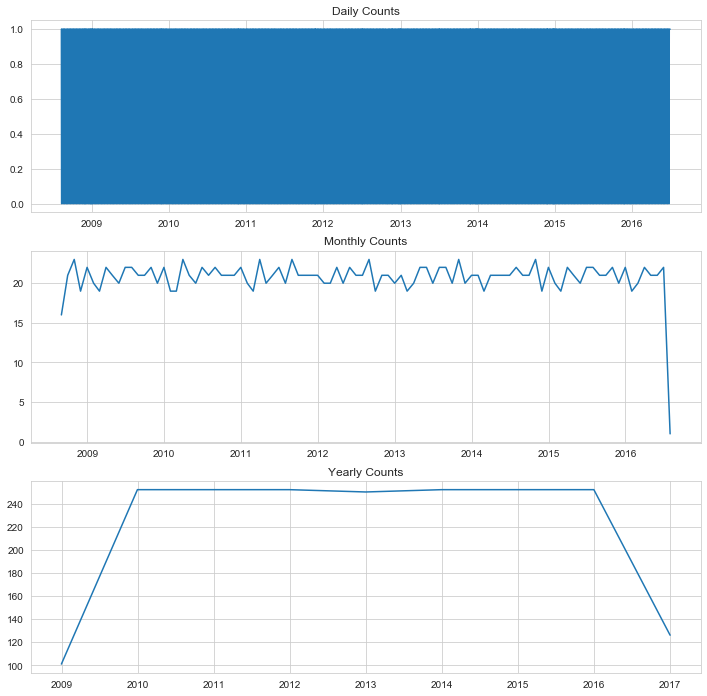

In [13]:
monthly_counts = new_df.resample('M').count()
yearly_counts = new_df.resample('A').count()
daily_counts = new_df.resample('D').count()

fig, ax = plt.subplots(3, figsize=(12,12))
ax[0].plot(daily_counts);
ax[0].set_title('Daily Counts');
ax[1].plot(monthly_counts);
ax[1].set_title('Monthly Counts');
ax[2].plot(yearly_counts);
ax[2].set_title('Yearly Counts');
plt.show()

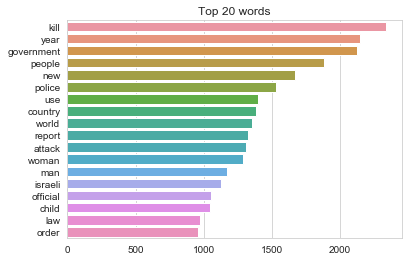

In [14]:
from collections import  Counter

corpus2 = [word for i in data_lemmatized for word in i]

counter=Counter(corpus2)
most=counter.most_common()
x, y=[], []
for word,count in most[:20]:
    if (word not in stop_words):
        x.append(word)
        y.append(count)

ax = plt.axes()
sns.barplot(x=y,y=x)

ax.set_title('Top 20 words')
plt.show()

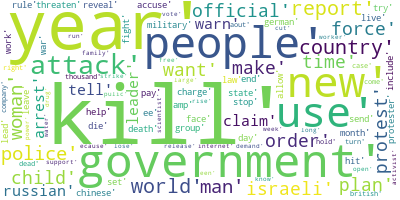

In [15]:
from wordcloud import WordCloud

corpus3 = []
for i in corpus2:
    if i not in stop_words:
        corpus3.append(i)
wordcloud = WordCloud(
background_color='white',
contour_color='green',
max_words=100, 
contour_width=3,
scale=1,
random_state=1)

wordcloud= wordcloud.generate(str(corpus3))
wordcloud.to_image()

## Prepare data for model

In [87]:
# Create Dictionary
data_dictionary = corpora.Dictionary(data_lemmatized)

# Create Corpus
text_data = data_lemmatized


# Term Document Frequency
corpus = [data_dictionary.doc2bow(t) for t in text_data]


print('Number of unique tokens: %d' % len(data_dictionary))

print('Number of unique tokens: %d' % len(corpus))

Number of unique tokens: 18426
Number of unique tokens: 1989


In [17]:
#Convert BOW to tfidf vectors
tfidf = models.TfidfModel(corpus) 

#Transform corpus to tfidf vector
corpus_tfidf = tfidf[corpus] 

## LSA MODEL

In [18]:
lsi_model = models.LsiModel(corpus=corpus_tfidf,
                            id2word=data_dictionary,
                            num_topics=15, 
                            chunksize=100)

In [19]:
topics = lsi_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.071*"israeli" + 0.063*"woman" + 0.063*"police" + 0.063*"protest" + 0.063*"russian"')
(1, '-0.198*"isis" + 0.174*"israeli" + 0.172*"protester" + -0.151*"russian" + 0.122*"protest"')
(2, '-0.297*"protester" + -0.271*"egyptian" + 0.255*"israeli" + -0.189*"protest" + 0.113*"ship"')
(3, '-0.234*"russian" + -0.222*"ukrainian" + -0.164*"georgian" + -0.150*"crimea" + -0.135*"israeli"')
(4, '-0.298*"reactor" + -0.181*"radiation" + -0.139*"nuclear" + -0.135*"plant" + 0.131*"egyptian"')
(5, '0.279*"georgian" + 0.213*"assange" + -0.152*"refugee" + -0.140*"migrant" + 0.136*"russian"')
(6, '-0.192*"assange" + -0.157*"israeli" + -0.138*"reactor" + -0.132*"snowden" + -0.110*"leak"')
(7, '-0.268*"egyptian" + -0.211*"ship" + 0.178*"riot" + 0.146*"georgian" + -0.143*"israeli"')
(8, '0.277*"georgian" + 0.245*"egyptian" + -0.170*"ship" + -0.142*"pirate" + -0.136*"riot"')
(9, '0.316*"georgian" + 0.173*"pirate" + -0.138*"assange" + -0.122*"israeli" + 0.118*"migrant"')
(10, '-0.250*"riot" + -0.153*"geo

In [21]:
corpus_lsi = lsi_model[corpus_tfidf]
for doc, as_text in zip(corpus_lsi, data):
    print(doc, as_text)

# LDA Model

In [59]:
lda_model = models.LdaModel(corpus=corpus,
                            id2word=data_dictionary,
                            num_topics=15, 
                            random_state=10000,
                            chunksize=100)

In [60]:
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.016*"tour" + 0.015*"otain" + 0.014*"upcoming" + 0.012*"trail" + 0.011*"racket"')
(1, '0.048*"introduce" + 0.027*"text" + 0.025*"explode" + 0.023*"period" + 0.020*"particle"')
(2, '0.056*"planet" + 0.046*"worth" + 0.026*"meat" + 0.015*"coin" + 0.011*"testing"')
(3, '0.052*"explosion" + 0.029*"tiny" + 0.015*"extremism" + 0.014*"skin" + 0.013*"inflation"')
(4, '0.025*"say" + 0.009*"amp" + 0.008*"firm" + 0.008*"year" + 0.007*"government"')
(5, '0.031*"infrastructure" + 0.007*"serial" + 0.004*"practically" + 0.000*"corrupt" + 0.000*"israeli"')
(6, '0.023*"march" + 0.022*"secrecy" + 0.021*"urning" + 0.010*"precision" + 0.009*"discharge"')
(7, '0.022*"instal" + 0.020*"unlawful" + 0.019*"touch" + 0.015*"contaminate" + 0.013*"rande"')
(8, '0.026*"wild" + 0.016*"flow" + 0.015*"watchdog" + 0.014*"loom" + 0.012*"wall"')
(9, '0.026*"say" + 0.012*"kill" + 0.010*"year" + 0.008*"attack" + 0.008*"report"')
(10, '0.015*"say" + 0.009*"year" + 0.009*"kill" + 0.008*"government" + 0.008*"new"')
(11, 

In [61]:
# Compute Perplexity

print('\nPerplexity: ', lda_model.log_perplexity(corpus)) 

# Compute Coherence Score

coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=data_dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -11.303957680999561

Coherence Score:  0.4017939386698395


In [38]:
def compute_coherence(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.LdaModel(corpus=corpus, num_topics=num_topics, id2word=dictionary, random_state=10000,
                            update_every=1,
                            chunksize=100)
        
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [39]:
model_list, coherence_values = compute_coherence(data_dictionary, corpus, data_lemmatized, start=1, limit=10, step=1)

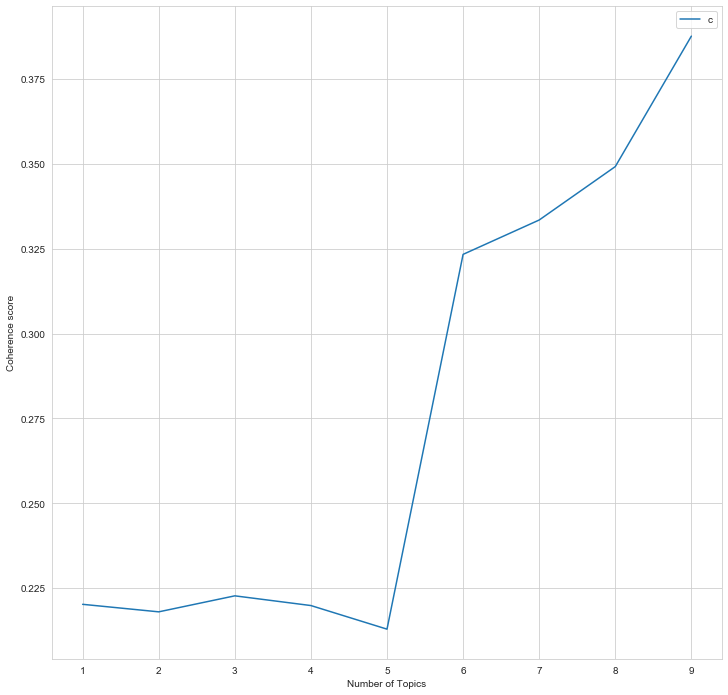

In [40]:
limit=10; start=1; step=1;
x = range(start, limit, step)
plt.figure(figsize=(12,12))
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [41]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 1  has Coherence Value of 0.2203
Num Topics = 2  has Coherence Value of 0.218
Num Topics = 3  has Coherence Value of 0.2227
Num Topics = 4  has Coherence Value of 0.2199
Num Topics = 5  has Coherence Value of 0.2129
Num Topics = 6  has Coherence Value of 0.3234
Num Topics = 7  has Coherence Value of 0.3335
Num Topics = 8  has Coherence Value of 0.3492
Num Topics = 9  has Coherence Value of 0.3877


In [29]:
# Select the model and print the topics
optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=10))

[(0,
  '0.014*"say" + 0.008*"kill" + 0.007*"new" + 0.006*"year" + 0.005*"people" + '
  '0.005*"attack" + 0.005*"call" + 0.005*"police" + 0.005*"country" + '
  '0.005*"report"'),
 (1,
  '0.007*"say" + 0.007*"year" + 0.007*"kill" + 0.005*"people" + 0.005*"new" + '
  '0.004*"report" + 0.004*"government" + 0.004*"use" + 0.004*"man" + '
  '0.004*"police"'),
 (2,
  '0.012*"say" + 0.007*"year" + 0.007*"government" + 0.006*"new" + 0.006*"use" '
  '+ 0.005*"report" + 0.005*"kill" + 0.005*"world" + 0.004*"russian" + '
  '0.004*"woman"'),
 (3,
  '0.021*"say" + 0.006*"people" + 0.006*"year" + 0.005*"kill" + '
  '0.005*"government" + 0.005*"police" + 0.004*"country" + 0.004*"amp" + '
  '0.004*"russian" + 0.004*"report"')]


In [86]:
pyLDAvis.enable_notebook()
display_model = pyLDAvis.gensim.prepare(lda_model, corpus, data_dictionary)
pyLDAvis.display(display_model)

C:\Users\chide\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:387: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]
C:\Users\chide\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


## Compare Models

In [82]:
lsi_topics = lsi_model.show_topics(formatted=False)
lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi_topics]
lsi_coherence = CoherenceModel(topics=lsi_topics[:5], texts=data_lemmatized, dictionary=data_dictionary, window_size=10).get_coherence()

In [83]:
lda_topics = lda_model.show_topics(formatted=False)
lda_topics = [[word for word, prob in topic] for topicid, topic in lda_topics]
lda_coherence = CoherenceModel(topics=lda_topics, texts=data_lemmatized, dictionary=data_dictionary, window_size=10).get_coherence()

In [84]:
def coherence_bar_graph(coherences, indices):
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.figure(figsize=(12,8))
    plt.title('Compare Topic Models pLSI and LDA')
    plt.bar(x, coherences, width=0.1, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
    

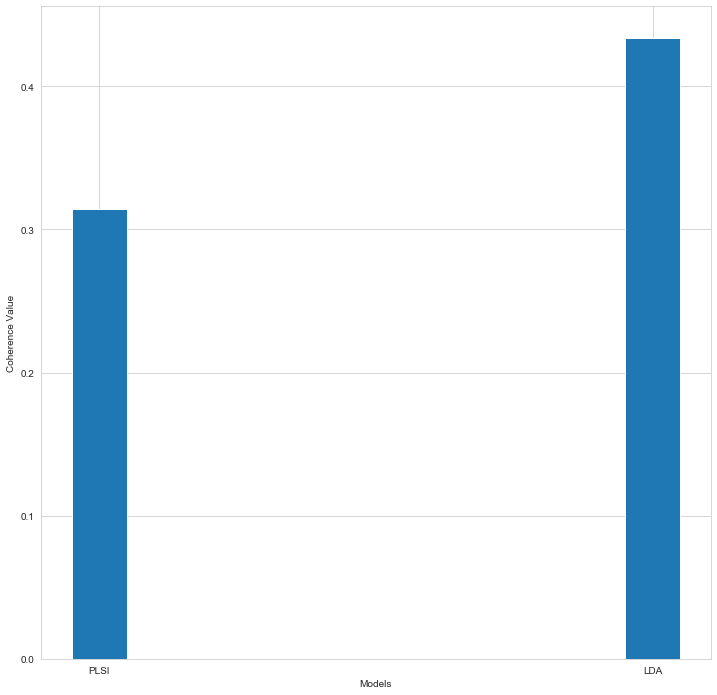

In [85]:
coherence_bar_graph([lsi_coherence, lda_coherence],
                   ['PLSI', 'LDA'])